# Neural Network for MNIST Digit Classification

## Introduction
We are going to build a simple neural network from scratch to classify handwritten digits from the MNIST dataset. Each MNIST image is a grayscale **28×28** pixel image of handwritten digits (0-9). The pixel values range from **0** (completely white) to **255** (completely black).

### Input Data:
Each MNIST image has **784 pixels** (28×28). We will flatten each image into a **784-dimensional vector**.

Let’s consider a matrix $X^T$, where:
- $X$ has dimensions $(784 \times m)$, where $m$ is the number of images in the dataset.
- Each **column** in $X^T$ contains 784 rows, one for each pixel in the image.

### Goal:
Predict the digit (0-9) represented by the pixels in the image using a neural network.

## Neural Network Architecture:
We will use a **three-layer neural network**:
- **Input Layer**: 784 input neurons (one for each pixel).
- **First Hidden Layer**: 10 neurons.
- **Second Hidden Layer**: 10 neurons.
- **Output Layer**: 10 neurons (one for each possible digit).


## Forward Propagation

### Step-by-Step Explanation:
1. **Input Layer**: The input is **$A^{[0]} = X$**, a matrix of dimensions $(784 \times m)$.
2. **First Hidden Layer**:
   - Compute the unactivated output: 
   $$Z^{[1]} = W^{[1]} A^{[0]} + b^{[1]}$$
   - Dimensions: $(10 \times m) = (10 \times 784)(784 \times m) + (10 \times 1)$.
   - Apply the **ReLU** activation function: 
   $$A^{[1]} = \text{ReLU}(Z^{[1]})$$
3. **Second Hidden Layer**:
   - Compute the unactivated output: 
   $$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
   - Dimensions: $(10 \times m) = (10 \times 10)(10 \times m) + (10 \times 1)$.
   - Apply the **Softmax** function: 
   $$A^{[2]} = \text{Softmax}(Z^{[2]})$$ to convert outputs into probabilities.


In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import NDArray

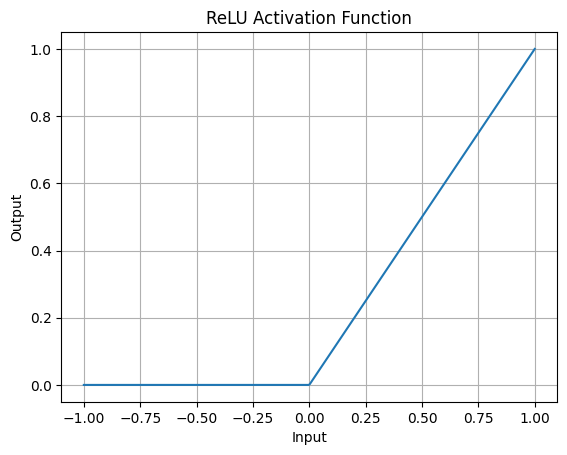

In [2]:
# Define the ReLU activation function
def relu(x: NDArray) -> NDArray:
    return np.maximum(0, x)

# Plot the ReLU function for visualization
x = np.linspace(-1, 1, 400)
plt.plot(x, relu(x))
plt.title('ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()


### ReLU Activation Function
The **ReLU (Rectified Linear Unit)** function is defined as:
$$
\text{ReLU}(x) = \max(0, x)
$$
It introduces non-linearity into the model by zeroing out all negative values and keeping positive values unchanged. Otherwise the output would just be linear combinations of the input.


where softmax is a sigmoid function

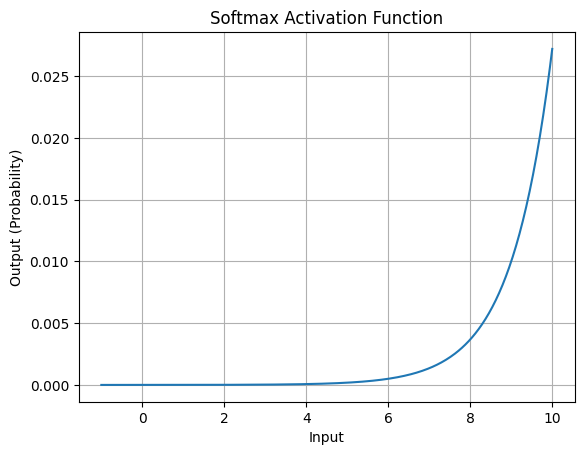

In [3]:
# Define the Softmax function
def softmax(x: NDArray) -> NDArray:
    exp_x = np.exp(x)  # Compute the exponentials of the input array
    return exp_x / np.sum(exp_x, axis=0)  # Normalize by dividing by the sum of exponentials

# Plot the Softmax function for visualization
x = np.linspace(-1, 10, 400)
plt.plot(x, softmax(x))
plt.title('Softmax Activation Function')
plt.xlabel('Input')
plt.ylabel('Output (Probability)')
plt.grid(True)
plt.show()


### Softmax Activation Function
The **Softmax** function is typically used in the output layer of a neural network for classification tasks. It converts the output into probabilities:
$$
\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}
$$
This ensures that the output values are non-negative and sum to 1, making them interpretable as probabilities.


## Backward Propagation (Gradient Descent)

### Step-by-Step Explanation:

Backward propagation is the process of calculating the gradient of the **loss function** with respect to the weights and biases of the network. This allows us to adjust the weights and biases to minimize the loss. We are essentially looking for the derivatives of the loss function with respect to the parameters in order to update them effectively.

1. **Calculate the Error at the Output Layer**:
   Start from the prediction and see how much the weights and biases contributed to the deviation from the actual label:
   $$
   dZ^{[2]} = A^{[2]} - Y
   $$
   The dimensions here are $(10 \times m) = (10 \times m) - (10 \times m)$.

   This represents the deviation of predictions from the actual labels. For instance, if the label is 4, then $Y = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]$, indicating that the correct class is at position 4.

2. **Calculate the Gradients for Weights and Biases in Layer 2**:
   To find how much each weight contributed to the error, we calculate the derivative of the loss function with respect to the weights:
   $$
   dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]^T}
   $$
   The dimensions here are $(10 \times 10) = (10 \times m)(m \times 10)$.

   The gradient for the biases is calculated as:
   $$
   db^{[2]} = \frac{1}{m} \sum dZ^{[2]}
   $$
   This gives us the average error for the biases.

3. **Continue to the First Hidden Layer**:
   For the first hidden layer, we compute:
   $$
   dZ^{[1]} = W^{[2]^T} dZ^{[2]} \cdot \text{ReLU}'(Z^{[1]})
   $$
   The dimensions here are $(10 \times m) = (10 \times 10)(10 \times m)$.

   Then, calculate the gradients for the weights and biases in this layer:
   $$
   dW^{[1]} = \frac{1}{m} dZ^{[1]} X^{T}
   $$
   The dimensions here are $(10 \times 784) = (10 \times m)(m \times 784)$.

   For the biases:
   $$
   db^{[1]} = \frac{1}{m} \sum dZ^{[1]}
   $$

4. **Update Weights and Biases**:
   After calculating the gradients, update the weights and biases using the learning rate $\alpha$:
   $$
   W^{[1]} \leftarrow W^{[1]} - \alpha dW^{[1]}
   $$
   $$
   b^{[1]} \leftarrow b^{[1]} - \alpha db^{[1]}
   $$
   $$
   W^{[2]} \leftarrow W^{[2]} - \alpha dW^{[2]}
   $$
   $$
   b^{[2]} \leftarrow b^{[2]} - \alpha db^{[2]}
   $$

   Here, $\alpha$ is called the learning rate, which controls how much we adjust the weights and biases with respect to the computed gradients.

5. **Iterate**:
   Repeat the forward propagation and backward propagation steps using the updated weights and biases to improve predictions. This process continues until the model converges or a specified number of iterations is reached.


In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('.../digit-recognizer/train.csv')

In [6]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [7]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2
    


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


In [8]:
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()  # Initialize parameters
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)  # Forward propagation
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)  # Update parameters
        
        if i % 50 == 0:  # Print progress every 50 iterations
            print(f"Iteration: {i}")
            predictions = get_predictions(A2)  # Ensure get_predictions is defined
            accuracy = get_accuracy(predictions, Y)  # Ensure get_accuracy is defined
            print(f"Accuracy: {accuracy}")
    
    return W1, b1, W2, b2  # Return the final parameters

In [9]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500,0.10)


Iteration: 0
[8 8 8 ... 8 8 8] [2 2 4 ... 5 9 2]
Accuracy: 0.12307317073170732
Iteration: 50
[2 2 4 ... 0 8 2] [2 2 4 ... 5 9 2]
Accuracy: 0.5534146341463415
Iteration: 100
[2 2 4 ... 9 9 2] [2 2 4 ... 5 9 2]
Accuracy: 0.7184146341463414
Iteration: 150
[2 2 4 ... 5 9 2] [2 2 4 ... 5 9 2]
Accuracy: 0.7684878048780488
Iteration: 200
[2 2 4 ... 5 9 2] [2 2 4 ... 5 9 2]
Accuracy: 0.796829268292683
Iteration: 250
[2 2 4 ... 5 9 2] [2 2 4 ... 5 9 2]
Accuracy: 0.8149024390243902
Iteration: 300
[2 2 4 ... 5 9 2] [2 2 4 ... 5 9 2]
Accuracy: 0.8272439024390243
Iteration: 350
[2 2 4 ... 5 9 2] [2 2 4 ... 5 9 2]
Accuracy: 0.8368292682926829
Iteration: 400
[2 2 4 ... 5 9 2] [2 2 4 ... 5 9 2]
Accuracy: 0.8434146341463414
Iteration: 450
[2 2 4 ... 5 9 2] [2 2 4 ... 5 9 2]
Accuracy: 0.8495609756097561


In [10]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


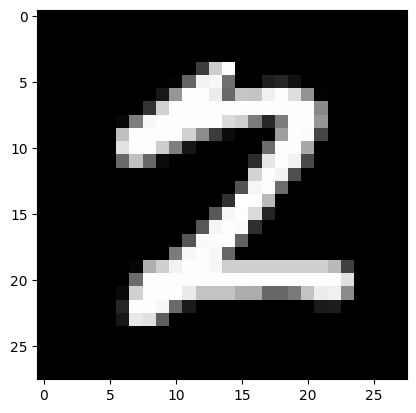

Prediction:  [2]
Label:  2


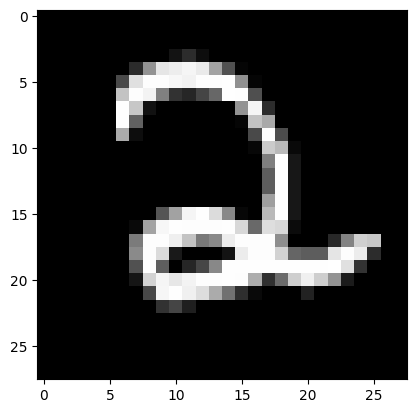

Prediction:  [4]
Label:  4


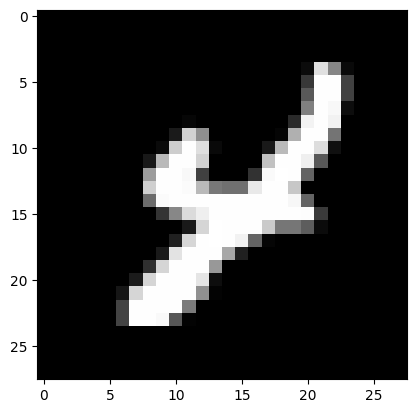

Prediction:  [9]
Label:  8


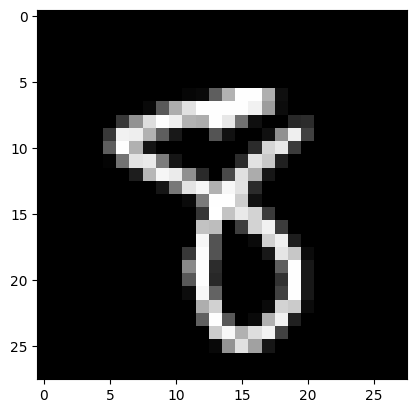

Prediction:  [1]
Label:  1


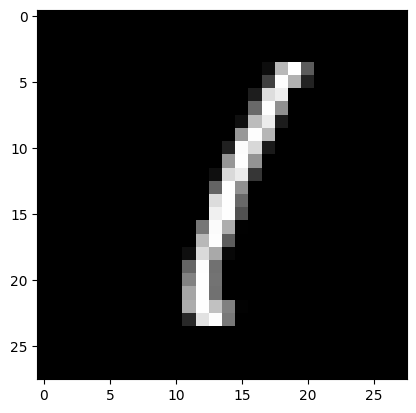

Prediction:  [9]
Label:  9


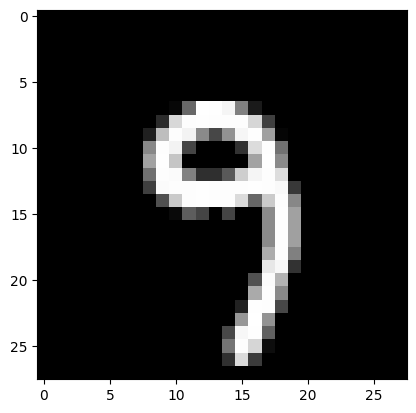

Prediction:  [5]
Label:  7


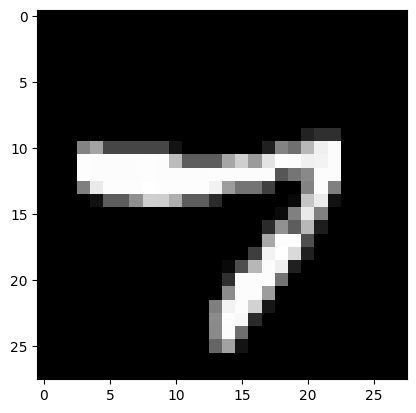

Prediction:  [7]
Label:  7


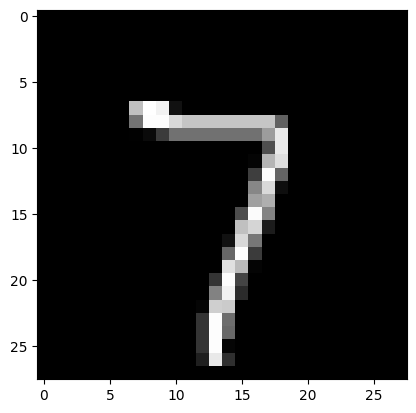

In [11]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)

In [12]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[4 5 3 8 8 1 2 3 2 2 6 3 6 2 8 2 6 0 9 5 9 2 4 9 4 7 7 7 2 0 0 1 7 8 1 4 3
 5 1 0 1 2 1 7 0 7 3 8 6 2 1 7 9 2 6 2 0 9 8 3 7 8 8 9 0 6 1 7 9 9 6 8 8 5
 5 6 9 5 6 3 1 0 9 0 2 1 4 4 4 5 9 4 2 9 5 9 9 3 9 5 4 9 1 9 1 8 4 3 3 1 0
 3 6 5 5 0 1 4 3 3 0 3 0 6 9 5 8 7 7 4 0 3 8 7 4 2 1 6 1 6 7 8 2 4 0 0 9 8
 2 0 5 2 2 4 6 4 1 9 4 7 7 9 8 8 3 3 4 5 3 1 4 9 5 3 7 0 3 9 1 7 8 6 6 1 6
 0 9 2 2 9 7 0 8 6 1 1 6 0 3 7 8 1 0 2 2 3 6 6 5 9 2 0 3 6 5 6 6 2 3 7 6 1
 9 5 4 0 6 4 6 0 1 0 9 0 2 6 8 6 7 1 2 2 9 8 2 4 7 6 5 7 7 9 0 1 1 7 6 8 0
 2 8 1 9 5 3 0 7 6 1 1 9 4 8 4 4 1 9 0 8 9 1 8 8 0 1 5 3 2 1 2 3 6 4 9 6 6
 7 5 3 5 7 4 7 2 5 7 7 9 0 1 0 6 1 0 9 4 7 4 3 2 7 8 6 8 0 8 1 7 8 7 7 2 4
 0 0 1 7 6 9 9 5 8 0 1 1 5 8 1 2 8 7 1 9 6 7 7 1 2 1 4 8 7 4 1 8 5 1 6 3 4
 2 2 7 1 9 3 2 8 7 2 9 2 1 3 7 4 5 9 0 7 4 4 9 8 9 0 6 9 0 0 4 7 1 5 7 8 1
 5 6 6 6 7 5 3 1 0 7 0 7 6 5 9 4 4 7 6 9 0 3 6 0 1 5 0 1 3 8 5 8 7 7 3 2 4
 3 4 5 1 5 2 1 6 3 3 0 5 6 8 7 4 8 6 4 1 0 5 6 3 4 8 2 7 6 9 0 6 0 0 3 7 6
 2 8 6 3 3 3 4 4 1 8 5 5 

0.864

# Neural Network Class Documentation

This `NeuralNetwork` class implements a fully connected feed-forward neural network designed to classify the MNIST dataset. The class is written to be flexible and allows future extensions for experimentation.

## Features

- **Gradient Descent Optimization**: Trains the model using gradient descent with adjustable learning rates and iterations.
- **Forward and Backward Propagation**: Performs forward and backward passes to compute the activations and gradients.
- **Activation Functions**: Includes `ReLU` for hidden layers and `softmax` for the output layer.
- **One-hot Encoding**: Converts labels into a one-hot encoded format.
- **Loss and Accuracy Calculation**: Computes cross-entropy loss and classification accuracy.
- **Weight Visualization**: Visualizes the learned weights of the first layer.
- **Confusion Matrix**: Computes and plots a confusion matrix to evaluate model performance on the test set.
- **User Interaction for Testing**: Allows testing individual samples with a user-friendly prediction interface.
- **Real-time Loss and Accuracy Plotting**: Optionally plots loss and accuracy during training.

---

## Class Methods

### `__init__(self)`
Initializes the weights and biases for the network:
- `W1` (Weights for the first layer)
- `b1` (Biases for the first layer)
- `W2` (Weights for the second layer)
- `b2` (Biases for the second layer)

### `init_params(self)`
Randomly initializes the weights and biases for the network:
- Weights are initialized with random values between -0.5 and 0.5.
- Biases are initialized similarly.

### `ReLU(self, Z)`
Applies the ReLU activation function:
- ReLU returns the input value if it is positive; otherwise, it returns 0.

### `ReLU_deriv(self, Z)`
Computes the derivative of the ReLU function used for backpropagation:
- The derivative is 1 for positive values and 0 for others.

### `softmax(self, Z)`
Applies the softmax function to compute the output probabilities:
- Used in the output layer for classification.

### `one_hot(self, Y)`
Converts integer labels into one-hot encoded vectors:
- This is required for the network to compute loss with cross-entropy.

### `forward_prop(self, X)`
Performs forward propagation:
- Takes input data `X`, computes activations for both layers, and returns intermediate results.

### `backward_prop(self, Z1, A1, Z2, A2, X, Y)`
Performs backward propagation:
- Computes the gradients for weights and biases using the chain rule.

### `update_params(self, dW1, db1, dW2, db2, alpha)`
Updates the parameters using gradient descent:
- `alpha`: Learning rate.

### `get_predictions(self, A2)`
Returns the class predictions based on the output activations `A2`.

### `get_accuracy(self, predictions, Y)`
Calculates the accuracy by comparing the predicted labels with true labels.

### `compute_loss(self, A2, Y)`
Computes the cross-entropy loss between predictions and true labels.

### `gradient_descent(self, X, Y, iterations, alpha, return_params=False, plot_loss_acc=False)`
Runs the gradient descent optimization loop:
- `iterations`: Number of training iterations.
- `alpha`: Learning rate.
- `return_params`: If `True`, returns the final weights and biases after training.
- `plot_loss_acc`: If `True`, plots loss and accuracy over iterations.

### `plot_loss_and_accuracy(self, losses, accuracies)`
Plots the loss and accuracy curves over training iterations.

### `plot_confusion_matrix(self, Y_true, Y_pred)`
Plots a confusion matrix to analyze model performance on classification tasks.

### `visualize_weights(self)`
Visualizes the learned weights of the first layer:
- The weights are reshaped into 28x28 grids (same as MNIST images).

### `test_prediction(self, index, X_train, Y_train)`
Tests a single image from the training set:
- Displays the image and prints the predicted and actual labels.

### `test_accuracy(self, X_dev, Y_dev)`
Computes accuracy on the test set:
- Evaluates the network's performance on unseen data.

### `confusion_matrix(self, predictions, true_labels, num_classes=10)`
Computes the confusion matrix by comparing predictions with true labels.

### `plot_confusion_matrix(self, cm)`
Displays a confusion matrix using a heatmap:
- Annotates the confusion matrix with color codes and text for easy interpretation.

---

## Usage Example

```python
# Create an instance of the neural network
nn = NeuralNetwork()

# Train the network using gradient descent
nn.gradient_descent(X_train, Y_train, iterations=1000, alpha=0.01, plot_loss_acc=True)

# Test accuracy on the development/test set
nn.test_accuracy(X_dev, Y_dev)

# Visualize the learned weights from the first layer
nn.visualize_weights()

# Test a prediction with a single image
nn.test_prediction(index=5, X_train=X_train, Y_train=Y_train)

# Generate and plot a confusion matrix
predictions = nn.get_predictions(A2)
cm = nn.confusion_matrix(predictions, Y_dev)
nn.plot_confusion_matrix(cm)


In [13]:
import numpy as np

class NeuralNetwork:
    def __init__(self):
        #Initialize parameters
        self.W1, self.b1, self.W2, self.b2 = self.init_params()
        
    def init_params(self):
        W1 = np.random.rand(10, 784) - 0.5
        b1 = np.random.rand(10, 1) - 0.5
        W2 = np.random.rand(10, 10) - 0.5
        b2 = np.random.rand(10, 1) - 0.5
        return W1, b1, W2, b2

    def ReLU(self, Z):
        return np.maximum(Z, 0)
    
    def ReLU_deriv(self, Z):
        return Z > 0

    def softmax(self, Z):
        A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
        return A
    
    def one_hot(self, Y):
        one_hot_Y = np.zeros((Y.size, Y.max() + 1))
        one_hot_Y[np.arange(Y.size), Y] = 1
        one_hot_Y = one_hot_Y.T
        return one_hot_Y
    
    def forward_prop(self, X):
        # Forward propagation
        Z1 = self.W1.dot(X) + self.b1
        A1 = self.ReLU(Z1)
        Z2 = self.W2.dot(A1) + self.b2
        A2 = self.softmax(Z2)
        return Z1, A1, Z2, A2
    
    def backward_prop(self, Z1, A1, Z2, A2, X, Y):
        m = Y.size  # Number of examples
        one_hot_Y = self.one_hot(Y)
        dZ2 = A2 - one_hot_Y
        dW2 = 1 / m * dZ2.dot(A1.T)
        db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = self.W2.T.dot(dZ2) * self.ReLU_deriv(Z1)
        dW1 = 1 / m * dZ1.dot(X.T)
        db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
        return dW1, db1, dW2, db2

    def update_params(self, dW1, db1, dW2, db2, alpha):
        # Update parameters using gradient descent
        self.W1 = self.W1 - alpha * dW1
        self.b1 = self.b1 - alpha * db1
        self.W2 = self.W2 - alpha * dW2
        self.b2 = self.b2 - alpha * db2
        
    def get_predictions(self, A2):
        return np.argmax(A2, axis=0)

    def get_accuracy(self, predictions, Y):
        return np.sum(predictions == Y) / Y.size

    def compute_loss(self, A2, Y):
        m = Y.shape[0]
        logprobs = -np.log(A2[Y, np.arange(m)])
        return np.sum(logprobs) / m

    
    def gradient_descent(self, X, Y, iterations, alpha, return_params = False, plot_loss_acc = False):
        losses = []
        accuracies = []
        
        for i in range(iterations):
            Z1, A1, Z2, A2 = self.forward_prop(X)
            dW1, db1, dW2, db2 = self.backward_prop(Z1, A1, Z2, A2, X, Y)
            self.update_params(dW1, db1, dW2, db2, alpha)
            
            predictions = self.get_predictions(A2)
            accuracy = self.get_accuracy(predictions, Y)
            loss = self.compute_loss(A2, Y)
            
            losses.append(loss)
            accuracies.append(accuracy)

            if i % 50 == 0:
                print(f"Iteration {i}: Accuracy = {accuracy * 100:.2f}%, Loss = {loss:.4f}")

        if plot_loss_acc:
            self.plot_loss_and_accuracy(losses, accuracies)
        if return_params:
            return self.W1, self.b1, self.W2, self.b2

    def plot_loss_and_accuracy(self, losses, accuracies):
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.plot(losses, label='Loss')
        plt.title('Loss over Iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(accuracies, label='Accuracy', color='orange')
        plt.title('Accuracy over Iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.show()

    def plot_confusion_matrix(self, Y_true, Y_pred):
        cm = confusion_matrix(Y_true, Y_pred)
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=np.arange(10), yticklabels=np.arange(10))
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

    def visualize_weights(self):
        W1 = self.W1  # Access the weights of the first layer
        W1_normalized = (W1 - np.min(W1)) / (np.max(W1) - np.min(W1))

        plt.figure(figsize=(12, 12))
        for i in range(W1_normalized.shape[0]):
            plt.subplot(10, 10, i + 1)  # Assuming 10x10 layout for 10 filters
            plt.imshow(W1_normalized[i].reshape(28, 28), cmap='gray')  # Reshape to 28x28 for MNIST
            plt.axis('off')
        plt.suptitle('Weights Visualization for First Layer')
        plt.show()

    def test_prediction(self, index, X_train, Y_train):
        # Get the current image from the training set
        current_image = X_train[:, index, None]  # Reshape to add the third dimension
        Z1, A1, Z2, A2 = self.forward_prop(current_image)  # Forward propagate the current image
        prediction = self.get_predictions(A2)  # Get the prediction
        label = Y_train[index]  # Get the true label
        
        print("Prediction: ", prediction)
        print("Label: ", label)

        # Reshape and scale the image for display
        current_image = current_image.reshape((28, 28)) * 255
        plt.gray()
        plt.imshow(current_image, interpolation='nearest')
        plt.show()
     
    def test_accuracy(self, X_dev, Y_dev):
        # Forward propagation on the test set
        _, _, _, A2 = self.forward_prop(X_dev)

        # Get predictions
        predictions = self.get_predictions(A2)

        # Calculate accuracy
        accuracy = self.get_accuracy(predictions, Y_dev)
        
        print(f"Test Accuracy: {accuracy * 100:.2f}%")
        return accuracy
    
    def visualize_weights(self):
        W1 = self.W1  # Access the weights of the first layer
        W1_normalized = (W1 - np.min(W1)) / (np.max(W1) - np.min(W1))

        plt.figure(figsize=(12, 12))
        for i in range(W1_normalized.shape[0]):
            plt.subplot(10, 10, i + 1)  # Assuming 10x10 layout for 10 filters
            plt.imshow(W1_normalized[i].reshape(28, 28), cmap='gray')  # Reshape to 28x28 for MNIST
            plt.axis('off')
        plt.suptitle('Weights Visualization for First Layer')
        plt.show()
        
    def confusion_matrix(self, predictions, true_labels, num_classes=10):
        # Initialize the confusion matrix
        cm = np.zeros((num_classes, num_classes), dtype=int)

        # Fill the confusion matrix
        for true, pred in zip(true_labels, predictions):
            cm[true, pred] += 1
            
        return cm

    def plot_confusion_matrix(self, cm):
        plt.figure(figsize=(8, 8))
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.colorbar()
        tick_marks = np.arange(cm.shape[0])
        plt.xticks(tick_marks, range(cm.shape[1]))
        plt.yticks(tick_marks, range(cm.shape[0]))

        # Loop over data dimensions and create text annotations
        thresh = cm.max() / 2.
        for i, j in np.ndindex(cm.shape):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.show()

In [14]:
test = NeuralNetwork()
test.gradient_descent(X_dev,Y_dev,500,0.1,return_params = False, plot_loss_acc = False)

Iteration 0: Accuracy = 8.50%, Loss = 2.9168
Iteration 50: Accuracy = 50.10%, Loss = 1.5938
Iteration 100: Accuracy = 67.40%, Loss = 1.0580
Iteration 150: Accuracy = 74.30%, Loss = 0.7852
Iteration 200: Accuracy = 79.70%, Loss = 0.6384
Iteration 250: Accuracy = 83.20%, Loss = 0.5443
Iteration 300: Accuracy = 86.20%, Loss = 0.4753
Iteration 350: Accuracy = 88.10%, Loss = 0.4215
Iteration 400: Accuracy = 89.50%, Loss = 0.3775
Iteration 450: Accuracy = 90.90%, Loss = 0.3419


In [15]:
test.test_accuracy(X_dev,Y_dev)

Test Accuracy: 91.70%


0.917

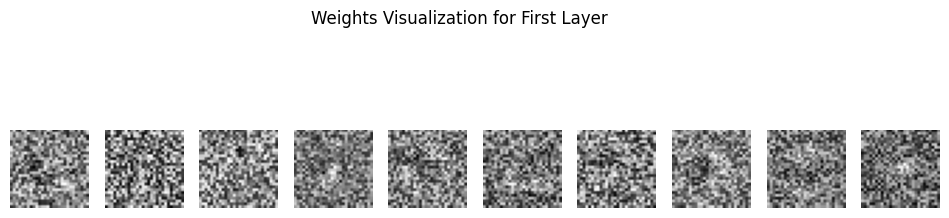

In [16]:
test.visualize_weights()

Confusion Matrix:
 [[104   0   0   1   0   0   0   0   0   0]
 [  0 120   1   0   0   0   0   0   1   0]
 [  1   1  89   3   0   1   1   4   0   0]
 [  2   0   1  95   0   2   0   2   3   2]
 [  0   0   0   0  75   0   1   0   1   5]
 [  0   0   1   2   0  65   1   0   8   1]
 [  0   0   0   0   0   0  95   0   2   1]
 [  0   4   3   1   0   2   0  89   0   5]
 [  0   0   0   2   0   3   0   0  90   2]
 [  0   0   1   2   3   1   1   3   1  95]]


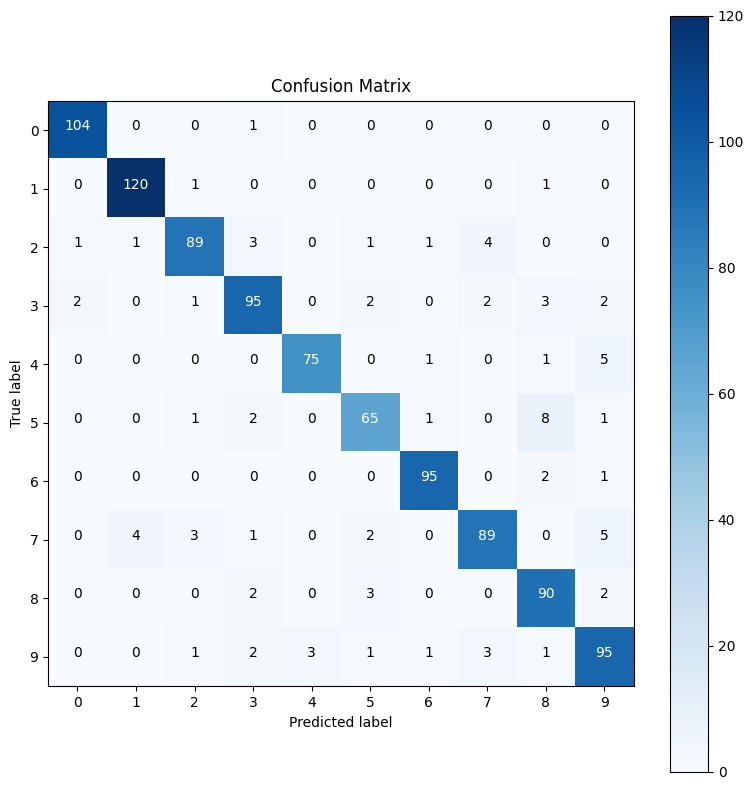

In [17]:
# Get predictions on the validation/test set
predictions = test.get_predictions(test.forward_prop(X_dev)[3])  # A2 from forward propagation
cm = test.confusion_matrix(predictions, Y_dev)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
test.plot_confusion_matrix(cm)

# UNDER CONSTRUCTION: Classification of user input. It does not really work yet...

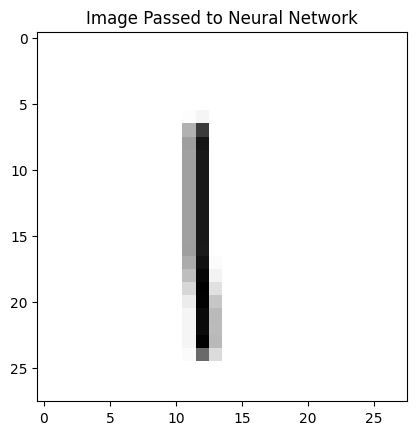

Predicted Digit: [3]


In [29]:
import tkinter as tk
import numpy as np
from PIL import Image, ImageDraw
import scipy.ndimage


class DrawingApp:
    def __init__(self, neural_network):
        self.root = tk.Tk()
        self.root.title("Draw a Digit")
        
        self.canvas = tk.Canvas(self.root, width=280, height=280, bg="white")
        self.canvas.pack()

        self.button_predict = tk.Button(self.root, text="Predict", command=self.predict)
        self.button_predict.pack()

        self.button_reset = tk.Button(self.root, text="Reset", command=self.reset_canvas)
        self.button_reset.pack()

        self.neural_network = neural_network
        
        # Initialize a blank image for drawing
        self.image = Image.new("L", (280, 280), 255)  # Create a white image
        self.draw = ImageDraw.Draw(self.image)

        # Variable to store the prediction text on the canvas
        self.prediction_text = None

        # Bind mouse events
        self.canvas.bind("<B1-Motion>", self.paint)

    def paint(self, event):
        x, y = event.x, event.y
        self.canvas.create_oval(x-5, y-5, x+5, y+5, fill="black", outline="black")
        self.draw.ellipse([x-5, y-5, x+5, y+5], fill="black", outline="black")

    def reset_canvas(self):
        # Clear the canvas
        self.canvas.delete("all")
        
        # Reset the image to white
        self.image = Image.new("L", (280, 280), 255)  # Create a new blank image
        self.draw = ImageDraw.Draw(self.image)  # Reset the drawing context

        # Clear the prediction text if it exists
        if self.prediction_text is not None:
            self.canvas.delete(self.prediction_text)
            self.prediction_text = None  # Reset the reference

            

    def preprocess_image(self):
        # Resize to 28x28
        img_resized = self.image.resize((28, 28))

        # Convert to NumPy array and normalize
        img_array = np.array(img_resized) / 255.0

        # Binarize the image (0 or 1 values only)
        img_array = (img_array > 0.5).astype(float)

        # Center the image (optional, but helps with alignment)
        cy, cx = scipy.ndimage.center_of_mass(img_array)
        shift_x = np.round(14 - cx).astype(int)
        shift_y = np.round(14 - cy).astype(int)
        img_array = scipy.ndimage.shift(img_array, shift=(shift_y, shift_x))

        return img_array.flatten()


            
            
    def predict(self):
        # Convert the image to a format suitable for the neural network
        img_resized = self.image.resize((28, 28))
        #img_array = np.array(img_resized) / 255.0  # Normalize to [0, 1]
        img_array = self.preprocess_image()  # Flatten to 784
        
        # Display the resized image before passing it to the neural network
        plt.imshow(img_resized, cmap='gray')
        plt.title("Image Passed to Neural Network")
        plt.show()


        # Make a prediction
        A2 = self.neural_network.forward_prop(img_array.reshape(-1, 1))[3]  # Use the neural network
        prediction = self.neural_network.get_predictions(A2)

        # Display the prediction
        print(f"Predicted Digit: {prediction}")

        # Clear any previous prediction text before drawing a new one
        if self.prediction_text is not None:
            self.canvas.delete(self.prediction_text)

        # Draw the new prediction on the canvas and store the text object reference
        self.prediction_text = self.canvas.create_text(140, 150, text=str(prediction[0]), font=("Helvetica", 48), fill="red")

    def run(self):
        self.root.mainloop()

# Example of how to run the application
# neural_net = NeuralNetwork()
# neural_net.gradient_descent(X_train, Y_train, 500, 0.1)  # Train your model first

# Now create and run the drawing application
drawing_app = DrawingApp(test)  # Pass the trained neural network instance
drawing_app.run()
